In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
df_intermediate = pd.read_csv('./data/02_intermediate/df_intermediate.csv')

df_intermediate.head()

,date,home_team,away_team,home_team_score,away_team_score,winner
0,1993-09-08,England,Poland,3,0,England
1,1993-09-26,Korea Republic,Australia,1,0,Korea Republic
2,1993-10-13,Netherlands,England,2,0,Netherlands
3,1993-10-13,Portugal,Switzerland,1,0,Portugal
4,1993-10-25,Japan,Korea Republic,1,0,Japan


In [3]:
df_intermediate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             428 non-null    object
 1   home_team        428 non-null    object
 2   away_team        428 non-null    object
 3   home_team_score  428 non-null    int64 
 4   away_team_score  428 non-null    int64 
 5   winner           428 non-null    object
dtypes: int64(2), object(4)
memory usage: 20.2+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_7876\2923520290.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


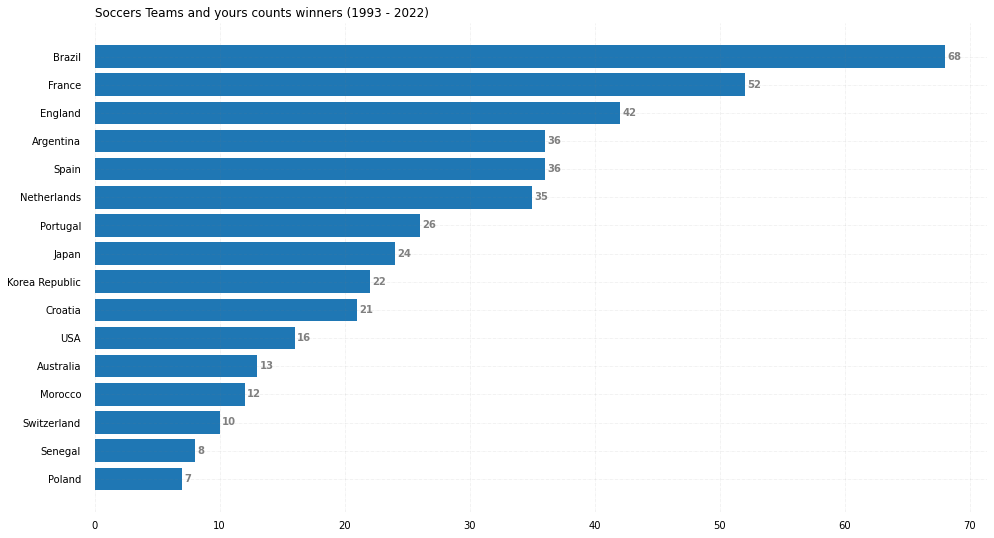

In [4]:
team_name = df_intermediate.winner.value_counts().index
winner_count = df_intermediate.winner.value_counts().values

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(team_name, winner_count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Soccers Teams and yours counts winners (1993 - 2022)',
             loc ='left', )
 
# Show Plot
plt.show()

In [5]:
# adding column of percentage of strongest based on rankings
winners_percent = (df_intermediate.winner.value_counts()/df_intermediate.shape[0])*100

df_model_input = pd.read_csv('./data/03_model_input/df_model_input.csv')

teams=['Netherlands','USA','Argentina','Australia','Japan','Croatia','Brazil','Korea Republic','England','Senegal','France','Poland','Morocco','Spain','Portugal','Switzerland']

df_model_input = df_model_input[df_model_input['teams'].isin(teams)]

df_model_input

,teams,percent_winners
0,Brazil,1.603162
2,Spain,1.323158
3,USA,1.312177
6,France,1.246294
7,Japan,1.224333
8,Argentina,1.163940
10,Korea Republic,1.158450
12,Netherlands,1.092566
13,Portugal,1.070605
14,England,1.059624


In [6]:
# adding column of percentage of the strongest based on the classified for the octaves

winners_percent_index = list(winners_percent.index)
winners_percent_values = list(winners_percent.values)

for i in range(len(winners_percent_index)):
    df_model_input.loc[df_model_input.teams == winners_percent_index[i], 'percent_winners_8'] = winners_percent_values[i]

df_model_input

,teams,percent_winners,percent_winners_8
0,Brazil,1.603162,15.887850
2,Spain,1.323158,8.411215
3,USA,1.312177,3.738318
6,France,1.246294,12.149533
7,Japan,1.224333,5.607477
8,Argentina,1.163940,8.411215
10,Korea Republic,1.158450,5.140187
12,Netherlands,1.092566,8.177570
13,Portugal,1.070605,6.074766
14,England,1.059624,9.813084


In [7]:
outname = 'df_model_input_8.csv'

outdir = './data/03_model_input'

if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir,outname)

df_model_input.to_csv(fullname, index=False)

In [8]:
# octaves games
teams_8 = [['Netherlands','USA'],['Argentina','Australia'],['Japan','Croatia'],['Brazil','Korea Republic'],['England','Senegal'],['France','Poland'],['Morocco','Spain'],['Portugal','Switzerland']]

In [9]:
# plotting percentage of teams
for i in range(len(teams_8)):
    df_isin = df_model_input.copy()

    print(f'{teams_8[i][0]} x {teams_8[i][1]}')
    df_isin=df_isin[df_isin['teams'].isin(teams_8[i])]
    display(df_isin)

Netherlands x USA


,teams,percent_winners,percent_winners_8
3,USA,1.312177,3.738318
12,Netherlands,1.092566,8.177570


Argentina x Australia


,teams,percent_winners,percent_winners_8
8,Argentina,1.163940,8.411215
29,Australia,0.878445,3.037383


Japan x Croatia


,teams,percent_winners,percent_winners_8
7,Japan,1.224333,5.607477
22,Croatia,0.922367,4.906542


Brazil x Korea Republic


,teams,percent_winners,percent_winners_8
0,Brazil,1.603162,15.887850
10,Korea Republic,1.158450,5.140187


England x Senegal


,teams,percent_winners,percent_winners_8
14,England,1.059624,9.813084
34,Senegal,0.834523,1.869159


France x Poland


,teams,percent_winners,percent_winners_8
6,France,1.246294,12.149533
32,Poland,0.856484,1.635514


Morocco x Spain


,teams,percent_winners,percent_winners_8
2,Spain,1.323158,8.411215
24,Morocco,0.922367,2.803738


Portugal x Switzerland


,teams,percent_winners,percent_winners_8
13,Portugal,1.070605,6.074766
52,Switzerland,0.746678,2.336449


In [10]:
# teams qualified for quarterfinals
teams_4 = ['Netherlands','Argentina','Croatia','Brazil','England','France','Morocco','Portugal']

df_intermediate_8=df_intermediate[df_intermediate['winner'].isin(teams_4)]

In [11]:
outname = 'df_intermediate_8.csv'

outdir = './data/02_intermediate'

if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir,outname)

df_intermediate_8.to_csv(fullname, index=False)